In [35]:
!pip install graphviz

In [4]:
!pip install pandas pymc numpy arviz seaborn aesara graphviz

     |████████████████████████████████| 1.4 MB 5.6 MB/s eta 0:00:01


In [5]:
import pandas as pd
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import aesara.tensor as at
from IPython.display import Video

In [8]:
random_seed = 314

In [10]:
spin_rate_data = pd.read_csv('/Users/mac/PyDelhi/savant_data.csv', parse_dates=['game_date']).dropna(subset=['spin_rate', 'game_date'])
spin_rate_data.head()

,pitches,player_id,player_name,game_date,total_pitches,pitch_percent,ba,iso,babip,slg,...,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance
0,47,450203,"Morton, Charlie",2021-07-16,107,43.9,0.077,0.077,0.167,0.154,...,28,0.1,6.36,111.0,148.0,139.0,134.0,299.0,320.0,300.0
1,47,621244,"Berríos, José",2021-05-08,104,45.2,0.143,0.286,0.143,0.429,...,28,-0.2,6.31,101.0,148.0,112.0,145.0,295.0,332.0,297.0
2,46,450203,"Morton, Charlie",2021-06-17,112,41.1,0.000,0.000,0.000,0.000,...,20,-0.4,6.21,105.0,151.0,134.0,137.0,314.0,322.0,291.0
3,45,450203,"Morton, Charlie",2021-08-31,106,42.5,0.100,0.000,0.143,0.100,...,26,-0.4,6.16,114.0,153.0,139.0,143.0,296.0,317.0,298.0
4,45,450203,"Morton, Charlie",2021-06-22,107,42.1,0.000,0.000,NaN,0.000,...,27,-0.8,6.28,107.0,149.0,135.0,135.0,290.0,304.0,291.0


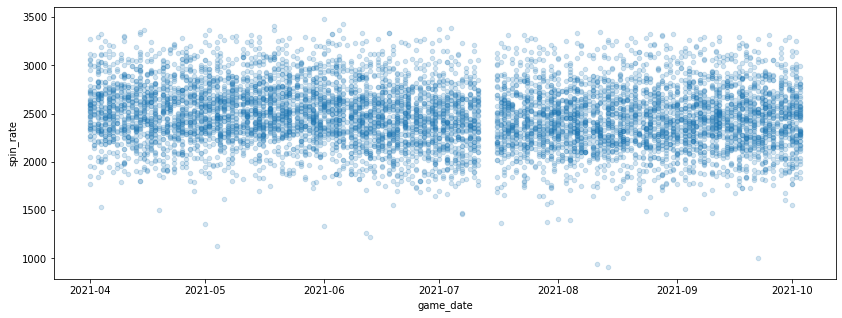

In [11]:
spin_rate_data.plot.scatter(x='game_date', y='spin_rate', figsize=(14,5), alpha=0.2);

In [12]:
day_ind, date = pd.factorize(spin_rate_data.game_date, sort=True)
spin_rate = spin_rate_data.spin_rate.values

In [16]:
with pm.Model() as spin_rate_model:
    mu = pm.Normal('mu', mu=2500, sigma=100, shape=2)
    tau = pm.Uniform('tau', lower=day_ind.min(), upper=day_ind.max())

In [17]:
type(mu)

pytensor.tensor.var.TensorVariable

In [18]:
pm.logp(tau, 5).eval()

array(-5.19849703)

In [19]:
pm.draw(mu, 5)

array([[2552.41600907, 2465.02294846],
       [2538.00731089, 2730.09686399],
       [2312.72452676, 2478.95811968],
       [2284.92461395, 2531.40774361],
       [2377.15873384, 2595.86296577]])

In [20]:
pm.distributions.__all__

['Uniform',
 'Flat',
 'HalfFlat',
 'Normal',
 'TruncatedNormal',
 'Beta',
 'Kumaraswamy',
 'Exponential',
 'Laplace',
 'StudentT',
 'Cauchy',
 'HalfCauchy',
 'Gamma',
 'Weibull',
 'Bound',
 'LogNormal',
 'Lognormal',
 'HalfStudentT',
 'ChiSquared',
 'HalfNormal',
 'Wald',
 'Pareto',
 'InverseGamma',
 'ExGaussian',
 'VonMises',
 'Binomial',
 'BetaBinomial',
 'Bernoulli',
 'Poisson',
 'NegativeBinomial',
 'DiracDelta',
 'Constant',
 'ZeroInflatedPoisson',
 'ZeroInflatedNegativeBinomial',
 'ZeroInflatedBinomial',
 'DiscreteUniform',
 'Geometric',
 'HyperGeometric',
 'Categorical',
 'OrderedLogistic',
 'OrderedProbit',
 'DensityDist',
 'CustomDist',
 'Distribution',
 'SymbolicRandomVariable',
 'Continuous',
 'Discrete',
 'MvNormal',
 'ZeroSumNormal',
 'MatrixNormal',
 'KroneckerNormal',
 'MvStudentT',
 'Dirichlet',
 'StickBreakingWeights',
 'Multinomial',
 'DirichletMultinomial',
 'OrderedMultinomial',
 'Wishart',
 'WishartBartlett',
 'LKJCholeskyCov',
 'LKJCorr',
 'AsymmetricLaplace',
 'R

In [23]:
mu.shape.eval()

array([2])

In [24]:
with spin_rate_model:
    sigma = pm.HalfNormal("sigma", 100.)

In [25]:
spin_rate_model.unobserved_RVs

[mu ~ N(2.5e+03, 100), tau ~ U(0, 181), sigma ~ N**+(0, 100)]

In [26]:
pm.logp(sigma, -1).eval()

array(-inf)

In [27]:
spin_rate_model.value_vars

[mu, tau_interval__, sigma_log__]

In [28]:
with spin_rate_model:
    r = pm.math.switch(tau >= day_ind, mu[0], mu[1])

In [29]:
r.shape.eval()

array([7791])

In [30]:
with spin_rate_model:
    spin_rate_like = pm.Normal('spin_rate_like', mu=r, observed=spin_rate)

In [31]:
spin_rate_model.observed_RVs

[spin_rate_like ~ N(f(tau, mu), 1)]

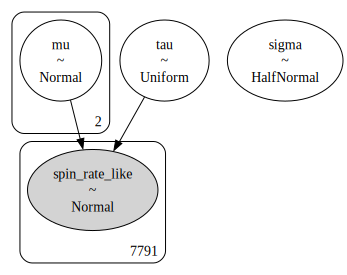

In [36]:
pm.model_to_graphviz(spin_rate_model)

In [37]:
with spin_rate_model:
    trace = pm.sample()

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/multipledispatch/dispatcher.py:27: AmbiguityWarning: 
Ambiguities exist in dispatched function _unify

The following signatures may result in ambiguous behavior:
	[object, ConstrainedVar, Mapping], [ConstrainedVar, Var, Mapping]
	[ConstrainedVar, Var, Mapping], [object, ConstrainedVar, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, object, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, object, Mapping]


Consider making the following additions:

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)
  warn(warning_text(dispatcher.name, ambiguities), AmbiguityWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [m

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 89 seconds.


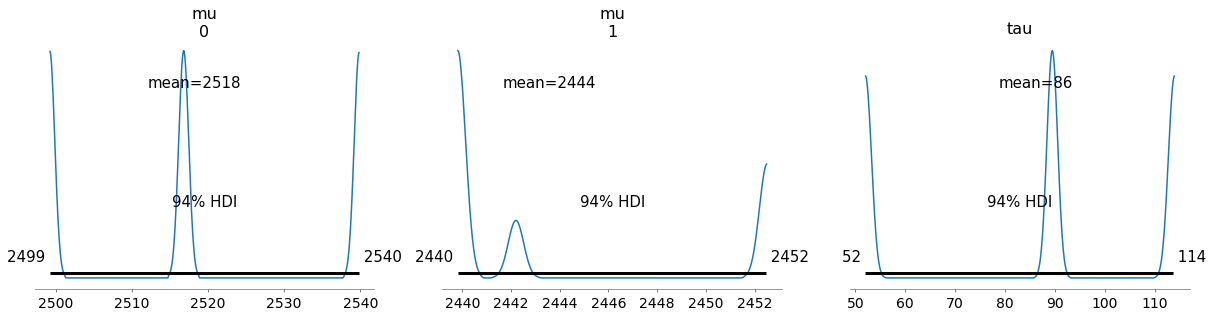

In [38]:
az.plot_posterior(trace, var_names=["mu", "tau"]);

In [39]:
date[68]

Timestamp('2021-06-08 00:00:00')

In [44]:
!python3 -V

Python 3.8.8
